<a href="https://colab.research.google.com/github/Gullen-Sw/Corpy-Co.inc-Assignment/blob/main/Good-Accuracy_To_Fail_to_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1498 files belonging to 2 classes.
Using 1199 files for training.
Found 1498 files belonging to 2 classes.
Using 299 files for validation.
Epoch 1/10
19/19 [==============================] - 75s 4s/step - loss: 1.0227 - accuracy: 0.4637 - val_loss: 0.6971 - val_accuracy: 0.4582
Epoch 2/10
19/19 [==============================] - 68s 3s/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6939 - val_accuracy: 0.4582
Epoch 3/10
19/19 [==============================] - 68s 3s/step - loss: 0.6920 - accuracy: 0.5321 - val_loss: 0.6931 - val_accuracy: 0.4582
Epoch 4/10
19/19 [==============================] - 68s 3s/step - loss: 0.6887 - accuracy: 0.5571 - val_loss: 0.6870 - val_accuracy: 0.6154
Epoch 5/10
19/19 [==============================] - 68s 3s/step - loss: 0.6825 - accuracy: 0.5705 - val_loss: 0.6781 - val_accuracy: 0.5753
Epoch 6/10
19/19 [==============================] - 68s 3s/step - loss: 0.6454 - accuracy: 0.6264 - val_loss: 0.6329 - val_accuracy: 0.6522
Epoch 7/10
19/1

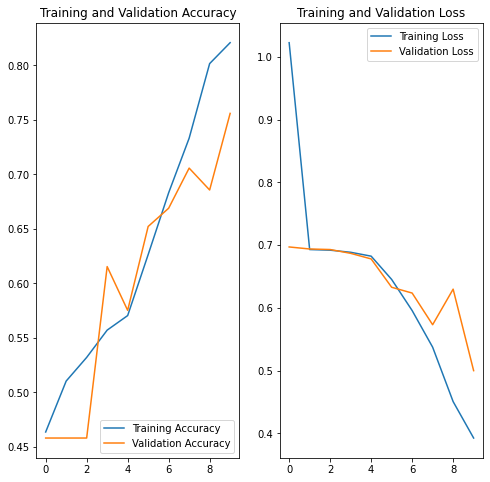

/content/drive/MyDrive/archive/test/origin/test_111.png
The image test_111.png most likely belongs to good with a 100.00 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_102.png
The image test_102.png most likely belongs to good with a 100.00 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_117.png
The image test_117.png most likely belongs to good with a 100.00 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_119.png
The image test_119.png most likely belongs to good with a 100.00 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_107.png
The image test_107.png most likely belongs to good with a 100.00 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_100.png
The image test_100.png most likely belongs to good with a 100.00 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_116.png
The image test_116.png most likely belongs to good with a 100.00 percent confidence.
/content/driv

In [72]:
#Reference
#https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6
#https://ivo-lee.tistory.com/91
#https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/1-7-%ec%b2%ab-%eb%b2%88%ec%a7%b8-%ec%95%a0%ed%94%8c%eb%a6%ac%ec%bc%80%ec%9d%b4%ec%85%98-%eb%b6%93%ea%bd%83%ec%9d%98-%ed%92%88%ec%a2%85-%eb%b6%84%eb%a5%98/
#https://note.nkmk.me/python-opencv-imread-imwrite/
#https://www.tensorflow.org/tutorials/images/classification?hl=ko

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg

batch_size = 64
validation_rate = 0.2
img_height = 256
img_width = 256

data_dir = '/content/drive/MyDrive/archive/train/normal/Augmentation'
test_dir = '/content/drive/MyDrive/archive/test/origin'

"""
data_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    validation_split = 0.2
)

test_gen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

train_generator = data_gen.flow_from_directory(
    data_dir,
    batch_size = batch_size,
    target_size = (img_height, img_width),
    shuffle = True,
    seed = 42,
    subset = 'training'
)

validation_generator = data_gen.flow_from_directory(
    data_dir,
    batch_size = batch_size,
    target_size = (img_height, img_width),
    shuffle = True,
    seed = 42,
    subset = 'validation'
)

test_generator = test_gen.flow_from_directory(
    test_dir, 
    target_size = (img_height, img_width)
)
"""

train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode = 'binary',
    validation_split = validation_rate,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = 'binary',
  validation_split = validation_rate,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
num_classes = 2

model = keras.Sequential()
#model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)))
#model.add(layers.experimental.preprocessing.RandomRotation(1))
#model.add(layers.experimental.preprocessing.RandomZoom(1))
model.add(layers.experimental.preprocessing.Rescaling(1/255))
model.add(layers.Conv2D(16, 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(padding = 'same'),)
#model.add(layers.Conv2D(16, 3, padding = 'same', activation='relu'))
#model.add(layers.MaxPooling2D(padding = 'same'))
model.add(layers.Conv2D(32, 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(padding = 'same'))
#model.add(layers.Conv2D(32, 3, padding = 'same', activation='relu'))
#model.add(layers.MaxPooling2D(padding = 'same'))
model.add(layers.Flatten())
"""
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation = 'softmax'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation = 'sigmoid'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation = 'relu'))
"""

model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(64, activation = "relu" ))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid")) #As we have two classes

"""
model = Sequential([
    train_generator,
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation = 'sigmoid')
])
"""

epochs=10
model.compile(optimizer = keras.optimizers.Adam(1e-3),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, batch_size = batch_size, epochs = epochs,  
                    validation_data = val_ds)
model.summary()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("/content/drive/MyDrive/archive/result.png")
plt.show()

for file in os.listdir('/content/drive/MyDrive/archive/test/origin'):
    path = os.path.join('/content/drive/MyDrive/archive/test/origin', file)
    print(path)
    image = cv2.imread(path)
    image = cv2.resize(image, (img_height, img_width))
    image = np.array(image)
    image = image.astype('float32')
    img_array = keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print(
        "The image {} most likely belongs to {} with a {:.2f} percent confidence."
        .format(str(file), class_names[np.argmax(score)], 100 * np.max(score))
    )


In [62]:
print(class_names)

['good', 'not-good']
